In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset


# label_mode: one of "fine", "coarse". If it is "fine" the category labels are the 100 fine-grained labels 
# "coarse" = grouped into 20 coarse-grained classes
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="fine")

169009152/169001437 [==============================] - 2s 0us/step


In [5]:
# Confirm that reloading the dataset does not require a download (ถูกเก็บไว้ใน local machine)

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="fine")

#### Examine the Dataset

In [7]:
# Examine the shape of the data.

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[41]


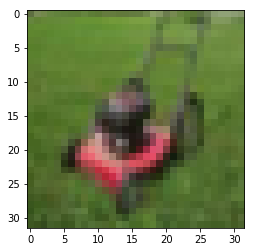

In [8]:
# Examine one of the images and its corresponding label

plt.imshow(train_images[500])
print(train_labels[500])

In [9]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [10]:
# Print a few of the labels

print( cifar100_fine_labels[0:10])

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']


lawn_mower


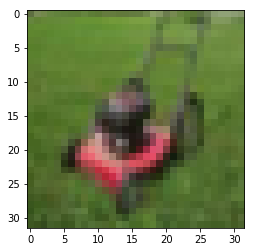

In [13]:
# Print the corresponding label for the example above

plt.imshow(train_images[500])
print(cifar100_fine_labels[np.squeeze(train_labels[500])]) # train_labels เป็น rank2 ต้อง squeeze ให้เหลือแค่ interger

#### Load the data using different label modes

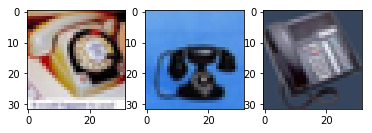

In [14]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [15]:
# Reload the data using the 'coarse' label mode

#  'coarse' label mode  จะกรุปคลาสเป็นหัวข้อใหญ่ๆ 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="coarse")

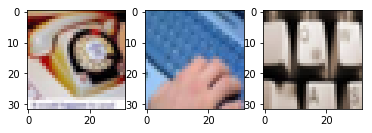

In [16]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [17]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [18]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [19]:
# Print the corresponding label for the example above
print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [20]:
from tensorflow.keras.datasets import imdb

In [21]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [23]:
# Print an example from the training dataset, along with its corresponding label

# เป็น sequence data ที่ เป็นlist ของ word ในรูปแบบ dictionary interger
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [24]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [25]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [26]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

# top 50 word อาจจะเป็น noise ใน dataset
# oov_char=2 replace คำที่ไม่มีใน dictionary เช่น top50 ที่ถูก skip ไป
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50 ,  oov_char=2)

In [27]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [29]:
# Determine the maximum and minimum sequence length

# length ยังคงเท่าเดิมเพราะเรา replace คำที่ skip เป็น oov
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [30]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [32]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [33]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [34]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [4]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [5]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [6]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [7]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [8]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [9]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [10]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [11]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.67,0.0,0.0,0.0,-1.0,0.8,-1.0,0.44,0.0
1,-1.00,0.75,1.0,0.0,1.0,1.0,0.6,0.0,0.56,0.0
2,-0.33,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0
3,1.00,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0
4,1.00,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0


In [12]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [13]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.67,0.0,0.0,0.0,-1.0,0.8,-1.0,0.44,0.0,0,1,0,0
1,0.75,1.0,0.0,1.0,1.0,0.6,0.0,0.56,0.0,1,0,0,0
2,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0,0,1,0,0
3,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0,0,0,0,1
4,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0,0,0,0,1


*N.B. The below cell has been updated since the coding tutorial.*

In [14]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [15]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.67,0.0,0.0,0.0,-1.0,0.8,-1.0,0.44,0,1,0,0,0.0
1,0.75,1.0,0.0,1.0,1.0,0.6,0.0,0.56,1,0,0,0,0.0
2,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0,1,0,0,0.0
3,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0,0,0,1,0.0
4,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0,0,0,1,0.0


In [16]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [17]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [18]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)
print(training)

(70, 13)
(30, 13)
[[ 0.67  0.    0.    0.   -1.    0.8  -1.    0.44  0.    1.    0.    0.
   0.  ]
 [ 0.75  1.    0.    1.    1.    0.6   0.    0.56  1.    0.    0.    0.
   0.  ]
 [ 0.92  1.    1.    0.    1.    1.   -1.    0.63  0.    1.    0.    0.
   0.  ]
 [ 0.67  1.    0.    0.    0.    1.   -1.    0.25  0.    0.    0.    1.
   0.  ]
 [ 0.58  1.    0.    0.    0.    0.6   1.    0.5   0.    0.    0.    1.
   0.  ]
 [ 0.78  1.    1.    0.    1.    0.6  -1.    0.38  1.    0.    0.    0.
   0.  ]
 [ 0.75  1.    1.    1.    0.    0.6   1.    0.25  0.    1.    0.    0.
   0.  ]
 [ 0.56  1.    0.    0.    0.    1.   -1.    0.63  0.    1.    0.    0.
   0.  ]
 [ 0.67  1.    1.    0.   -1.    0.8   0.    0.31  0.    0.    0.    1.
   0.  ]
 [ 0.64  0.    0.    0.    0.    1.   -1.    0.63  0.    0.    0.    1.
   0.  ]
 [ 0.75  1.    1.    1.    0.    0.6  -1.    0.19  0.    1.    0.    0.
   0.  ]
 [ 0.67  0.    0.    1.    0.    0.8  -1.    0.25  0.    0.    0.    1.
   0.  ]
 [ 0.69  1

In [21]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1] # label is last column

#### Create the Generator

In [22]:
# Create a function that returns a generator producing inputs and labels

# Generator เป็น iterative object ที่จะ return ค่าเมื่อมีการเรียกใช้งาน 1 ครั้ง
# เราเอามาประยุกต์ใช้กับ dataset ทำให้ไม่ต้อง store data ทั้งหมดใน memory
# แต่จะ return ค่าออกมาทีละ batch และจำไว้ว่าเรียก dataอะไรมาแล้วบ้าง(มองเป็นcheckpoint)
# ในเคสนี้ get_generator เป็น for loop ที่ generate ค่า data ถัดไป 1 batch ออกมาทุกครั้งที่เรียกใช้ จนครบทั้ง dataset
# เมือครบแล้วจะเรียกต่อไม่ได้ ต้อง declare generator ใหม่
def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [23]:
# Apply the function to our training features and labels with a batch size of 10

# create generator object
train_generator = get_generator(training_features, training_labels, batch_size=10)

In [24]:
# Test the generator using the next() function

next(train_generator) # ได้ 10 input vector และ 10 label (batch_size=10)
# จะรันได้ 7 iteration เพราะ sample = 70 และ batch size = 10 (ตามเงื่อนไขของ generator เรา)

(array([[ 0.67,  0.  ,  0.  ,  0.  , -1.  ,  0.8 , -1.  ,  0.44,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  0.  ,  1.  ,  1.  ,  0.6 ,  0.  ,  0.56,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.92,  1.  ,  1.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.63,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.58,  1.  ,  0.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.5 ,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.78,  1.  ,  1.  ,  0.  ,  1.  ,  0.6 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 ,  1.  ,  0.25,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  1.  ,  0.  , -1.  ,  0.8 ,  0.  ,  0.31,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.64,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
 

#### Build the model

In [25]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [26]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [27]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [28]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [148]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5

# Generator เป็น for loop ที่ return batch input , label ทีละ batch เมื่อ รันจนครบ dataset รันต่อไม่ได้ (ไม่มี data)
# จึงต้องบอก keras ว่าจะเรียก generator กี่ครั้งใน 1 epoch (1 epoch = dataset ทั้งชุด)
# train_steps = batch number
train_steps = len(training) // batch_size # need to know how many step we can iterate over before run out of data

In [58]:
# Set the epochs to 3

epochs = 3

In [60]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
    model.fit_generator(train_generator,steps_per_epoch=train_steps, validation_data = validation_generator , validation_steps =1)

14/14 [==============================] - 0s 31ms/step - loss: 0.1683 - accuracy: 0.9571 - val_loss: 0.4009 - val_accuracy: 0.9333


In [61]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

ValueError: Empty training data.

#### Make an infinitely looping generator

In [158]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    # ปกติเมือจบ for loop จะ error StopIteration เพราะ จบ list ของ data 
    # แต่การใส่ while ซ้อนไว้ด้านนอก ทำให้ เมื่อจบloop จะเรียก forloop ใหม่จากจุดแรกของ list เป็นการ reset (จบ while loop 1 ครั้ง)
    # gererator จะจำcheckpoit ได้เองว่า gendata ถึงจุดไหนแล้ว ทั้ง while loop for loop
    while True:
        for n in range(int(len(features)/batch_size)):
            #print(f'Batch: {n}')
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [150]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [154]:
next(train_generator_cyclic)

Batch: 3


(array([[ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.44,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.75,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.44,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.75,  1.  ,  1.  ,  1.  ,  1.  ,  0.8 ,  1.  ,  0.25,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.56,  0.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.56,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  0.8 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ]], dtype=float32),
 array([0., 1., 0., 0., 0.], dtype=float32))

In [65]:
# Assert that the new cyclic generator does not raise a StopIteration

# ลองเช็คดูว่า คืนค่าแบบ infinite loop ได้ยัง 
for i in range(2*train_steps):
    next(train_generator_cyclic)

In [179]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [157]:
# Train the model

# คราวนี้เราสามารถ เพิ่มพารามิเตอร์ epochs เพื่อนให้ fit วนลูปตามจำนวน epoch ที่เราต้องการได้
# อย่าลืมว่าต้องคำนวน steps_per_epoch ให้ถูก เพราะ generator จะรีเซ็ต data เมื่อครบ dataset (1 epoch) จะสัมพันธ์กับ checkpoint ใน generator object
# เมื่อขึ้น epoch ใหม่ generator เราก็ต้องขึ้น while loop ใหม่ และ เริ่ม for loop step ที่0
model.fit_generator(train_generator_cyclic,steps_per_epoch=train_steps, validation_data = validation_generator_cyclic , validation_steps =1 , epochs = 3)

Epoch 1/3
Batch: 4
Batch: 5
Batch: 6
Batch: 7
Batch: 8
Batch: 9
Batch: 10
Batch: 11
Batch: 12
Batch: 13
Batch: 0
Batch: 1
 2/14 [===>..........................] - ETA: 0s - loss: 0.7369 - accuracy: 0.4000Batch: 3
Batch: 4
 4/14 [=======>......................] - ETA: 0s - loss: 0.7318 - accuracy: 0.5000Batch: 5
Batch: 6
Batch: 7
Batch: 8
 8/14 [================>.............] - ETA: 0s - loss: 0.6514 - accuracy: 0.5500Batch: 9
Batch: 10
Batch: 11
11/14 [======================>.......] - ETA: 0s - loss: 0.5673 - accuracy: 0.6364Batch: 12
Batch: 13
Batch: 0
Batch: 0
Batch: 1
Batch: 2
Batch: 3
Batch: 4
Batch: 5
Batch: 0
Batch: 1
Batch: 2
Batch: 3
Batch: 4
Batch: 5
14/14 [==============================] - 1s 45ms/step - loss: 0.5347 - accuracy: 0.7000 - val_loss: 0.8000 - val_accuracy: 0.6000
Epoch 2/3
Batch: 1
 1/14 [=>............................] - ETA: 0s - loss: 0.1691 - accuracy: 1.0000Batch: 2
Batch: 3
Batch: 4
 4/14 [=======>......................] - ETA: 0s - loss: 0.2841 - accura

#### Evaluate the model and get predictions

In [174]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [175]:
# Get predictions on the validation data

# ใช้ generator แบบไม่ infinite เพราะเรา predict แค่ครั้งเดียว
# batch_size=30 คือทั้ง validation data ดังนั้น step = 1 (เรียกเกินจะ error)
predictions = model.predict_generator(validation_generator , steps=1)
print(np.round(predictions.T[0]))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [176]:
# ลองเทสกับ 2 step batch size = 15

validation_generator = get_generator(validation_features, validation_labels, batch_size=15)
predictions = model.predict_generator(validation_generator , steps=2)
print(np.round(predictions.T[0]))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


จะสังเกตุว่าผลลัพท์เหมือนกัน ถ้ามีหลายstep จะเอา ผลลัพธ์มา append กัน
ใช้หลาย step เมื่อข้อมูลมีเยอะ

In [161]:
# Print the corresponding validation labels

print(validation_labels)

[1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0.]


In [182]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [185]:
# Evaluate the model
# model.evaluate ที่ pass validation_generator จะไม่ต้องกำหนด step เพราะเรียกจน exhausted list
# ถ้าไปเรียกกับ validation_generator_cyclic ก็จะ infinite loop เพราะจะไม่ exhaust
print(model.evaluate(validation_generator))

StopIteration: 

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [243]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [384]:
from tensorflow.keras.datasets import cifar10

In [385]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [386]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [387]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [388]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [389]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


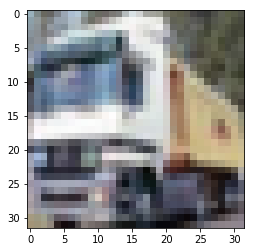

In [390]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [391]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [392]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [393]:
# Create a function to convert an image to monochrome

# สร้าง preprocess function ขึ้นมาเอง
  #  The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [394]:
# Create an ImageDataGenerator object

# ประกาศ Instance ImageDataGenerator (ยังไม่ได้สร้าง generation object แค่เลือก option ที่จะ pre processing)
image_generator = ImageDataGenerator(
                    # ใช้ preprocess function ของเราเอง
                    preprocessing_function = monochrome,
                    rotation_range =180,
                    rescale = (1/255))
'''
.fit
This computes the internal data stats related to the data-dependent transformations, based on an array of sample data.
Only required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.

'''
image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [374]:
# Create an iterable generator using the `flow` function

# สร้าง iterable generator object
# เหมือนตอนประกาศ generator object ปกติ

# Input data. Numpy array of rank 4 (num example , width , height , channel) or a tuple
image_generator_iterable = image_generator.flow(training_features,training_labels,batch_size=1,shuffle=False)

In [383]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

StopIteration: 

#### Flow from directory

In [400]:
! ls data/flowers-recognition-split/val

daisy  dandelion  rose	sunflower  tulip


In [397]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [398]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [399]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [401]:
# Create a training data generator
'''
classes = Optional list of class subdirectories (e.g. ['dogs', 'cats']). Default: None. 
If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory, 
'''
# ตัวgenerator จะเอารูปในโฟลเดอร์ จัดการแปลงเป็น numpy array rank4 ให้เอง และ gen ออกมาเป็น tf.data object
# เป็น generator ที่ รันแบบ infinite loop ได้เช่นเดียวกัน รันจน exhaust = ครบ1epoch
train_generator = datagenerator.flow_from_directory(train_path,batch_size = 64 , classes = classes ,target_size=(16,16))

Found 3027 images belonging to 5 classes.


In [402]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path,batch_size = 64 , classes = classes ,target_size=(16,16))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 0. 1.]


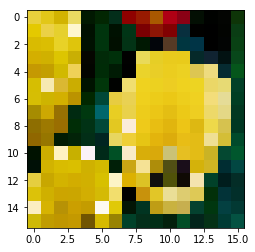

In [405]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [406]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path,batch_size = 64 , classes = classes ,target_size=(16,16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [417]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [418]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [419]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [420]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

#### Train the model

In [421]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [412]:
# Fit the model

model.fit_generator(train_generator,steps_per_epoch=train_steps_per_epoch, validation_data = val_generator , validation_steps =val_steps , epochs = 5)

Epoch 1/5
47/47 [==============================] - 51s 1s/step - loss: 1.6033 - accuracy: 0.2481 - val_loss: 1.5867 - val_accuracy: 0.2492
Epoch 2/5
47/47 [==============================] - 32s 679ms/step - loss: 1.5346 - accuracy: 0.2791 - val_loss: 1.4975 - val_accuracy: 0.3211
Epoch 3/5
47/47 [==============================] - 32s 683ms/step - loss: 1.4509 - accuracy: 0.3304 - val_loss: 1.4418 - val_accuracy: 0.3539
Epoch 4/5
47/47 [==============================] - 32s 674ms/step - loss: 1.3957 - accuracy: 0.3831 - val_loss: 1.3642 - val_accuracy: 0.4086
Epoch 5/5
47/47 [==============================] - 32s 677ms/step - loss: 1.3323 - accuracy: 0.4235 - val_loss: 1.3453 - val_accuracy: 0.4164


In [422]:
# ทดสอบดูว่า ถ้าไม่ใส่ step per epoch จะใช้ได้ไหม
#model.fit_generator(train_generator, validation_data = val_generator , epochs = 5)

Epoch 1/5
48/48 [==============================] - 36s 752ms/step - loss: 1.6029 - accuracy: 0.2540 - val_loss: 1.5902 - val_accuracy: 0.2562
Epoch 2/5
48/48 [==============================] - 32s 665ms/step - loss: 1.5652 - accuracy: 0.2897 - val_loss: 1.5366 - val_accuracy: 0.3117
Epoch 3/5
48/48 [==============================] - 32s 675ms/step - loss: 1.5151 - accuracy: 0.3323 - val_loss: 1.5011 - val_accuracy: 0.3171
Epoch 4/5
48/48 [==============================] - 32s 667ms/step - loss: 1.4714 - accuracy: 0.3538 - val_loss: 1.4533 - val_accuracy: 0.3503
Epoch 5/5
48/48 [==============================] - 33s 687ms/step - loss: 1.4096 - accuracy: 0.3799 - val_loss: 1.3719 - val_accuracy: 0.3927


#### Evaluate the model

In [423]:
# Evaluate the model

model.evaluate_generator(val_generator,val_steps)

[1.3739825189113617, 0.39453125]

In [427]:
# หรือ evaluate แบบปกติ ก็ได้ kerasจะรู้ว่าจะจบdataset ตรงไหน
model.evaluate(val_generator)

21/21 [==============================] - 8s 359ms/step - loss: 1.3719 - accuracy: 0.3927


[1.3719370876039778, 0.39274693]

#### Predict using the generator

In [424]:
# Predict labels with the model

predictions = model.predict_generator(val_generator,steps=1)
print(np.round(predictions,2))

[[0.26 0.26 0.18 0.14 0.16]
 [0.13 0.23 0.15 0.22 0.27]
 [0.   0.11 0.02 0.67 0.19]
 [0.02 0.11 0.16 0.17 0.54]
 [0.01 0.11 0.04 0.53 0.3 ]
 [0.28 0.28 0.16 0.14 0.15]
 [0.14 0.22 0.21 0.12 0.31]
 [0.08 0.42 0.05 0.38 0.07]
 [0.22 0.3  0.18 0.13 0.18]
 [0.02 0.11 0.17 0.1  0.6 ]
 [0.02 0.1  0.16 0.14 0.57]
 [0.08 0.39 0.05 0.39 0.09]
 [0.16 0.42 0.07 0.28 0.07]
 [0.19 0.25 0.19 0.13 0.23]
 [0.13 0.2  0.21 0.14 0.33]
 [0.26 0.31 0.17 0.13 0.14]
 [0.16 0.23 0.21 0.13 0.27]
 [0.09 0.32 0.08 0.35 0.15]
 [0.11 0.19 0.23 0.12 0.36]
 [0.3  0.32 0.14 0.13 0.11]
 [0.25 0.26 0.16 0.16 0.17]
 [0.01 0.26 0.02 0.63 0.08]
 [0.06 0.16 0.14 0.24 0.39]
 [0.3  0.31 0.15 0.13 0.11]
 [0.02 0.27 0.03 0.56 0.11]
 [0.02 0.1  0.09 0.28 0.51]
 [0.33 0.35 0.12 0.12 0.08]
 [0.29 0.31 0.15 0.13 0.12]
 [0.05 0.15 0.17 0.17 0.46]
 [0.02 0.11 0.15 0.17 0.55]
 [0.22 0.27 0.19 0.13 0.2 ]
 [0.03 0.19 0.06 0.47 0.24]
 [0.05 0.15 0.16 0.17 0.47]
 [0.32 0.35 0.13 0.12 0.08]
 [0.18 0.26 0.2  0.13 0.23]
 [0.25 0.27 0.17 0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

- Create a source dataset from your input data.
- Apply dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.
<br>Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [3]:
x = np.zeros((100,10,2,2))

In [9]:
x.shape

(100, 10, 2, 2)

In [4]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [5]:
# Inspect the Dataset object

print(dataset1)
print(dataset1.element_spec) # shape จะโชว์ element ในแต่ละ example (ไม่โชว์ num example) 

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [6]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [7]:
# Try creating a dataset from the tensor x2

# จะ error เพราะ แต่ละ element คนละ shape (example ทุกตัวต้องเหมือนกัน)
dataset2 = tf.data.Dataset.from_tensor_slices(x2)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [10]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [12]:
len(x2)

3

In [13]:
# Create another dataset from the new x2 and inspect the Dataset object

# แปลง list เป็น dataset object
# จะมี 3  example ที่ shape (10,1) (list ด้านบนมี 3 element (10,1))
dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [14]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [15]:
# Combine the two datasets into one larger dataset

# สร้าง dataset object ที่มาเป็นคู่ นึกถึง x_train , y_train  ดังนั้น shape ไม่เท่ากันก็ได้
# เราเอา dataset object 2 ตัวมา zip คู่กัน
#### WARNING #### จะสั่งเกตว่า sample ในสอง dataset ไม่เท่ากัน
# โดยปกติ num x_train , y_train จะเท่ากัน
# ในเคสนี้ zip ได้ แต่จะ iteratble ได้แค่ จำนวน number ของ datasetที่น้อยกว่า (dataset2)
# ดูตัวอย่างด้านล่าง
dataset_zipped = tf.data.Dataset.zip((dataset1,dataset2))

In [16]:
# Print the element_spec

# tuple ของ tensor มองได้เป็น x_train , y_train
# เมื่อ iterable จะได้ค่ามาเป็นคู่ๆ
print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [17]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [18]:
# Find the number of batches in the zipped Dataset

# สั่งเกตุว่าจะหยุด iterable เมื่อ = numsample ของ dataset ที่น้อยกว่า
get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [19]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
# Create a Dataset from the MNIST data

# MNIST dataset เป็น numpy array เรา pass เข้าไปเป็น tuple x,y เพื่อสร้าง dataset object ที่ return ค่ามาเป็นคู่ x ,y
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [23]:
# Inspect the Dataset object
# จะเห็นว่า x เป็น รูป grayscale 28x28 , y เป็น label
print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [24]:
# Inspect the length of an element using the take method

# ทำให้ mnist_dataset เป็น iterable object
# mnist_dataset.take(1) = batch size = 1 (เอาออกมาที่ละคู่)
element = next(iter(mnist_dataset.take(1)))

In [25]:
# Examine the shapes of the data

print(element[0].shape) # อันแรกใน tuple เป็น รูป
print(element[1].shape)# อันที่สองใน tuple เป็น  label

(28, 28)
()


#### Create a dataset from text data

In [26]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [27]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [28]:
# Load the lines from the files into a dataset using TextLineDataset

# pass list of path ของ textfile
shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [29]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [30]:
# Compute the number of lines in the first file

# ในไฟล์แรกจะมี 121 บรรทัด
lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [32]:
# Compute the number of lines in the shakespeare dataset we created

# dataset ที่เราสร้างมาจากไฟล์ทั้งหมด เอา text ทุกบรรทัดมาเป็น example โหลดต่อกัน
#  element data ทีละบรรทัด จนจบแต่ละไฟล์และขึ้นไฟล์ใหม่
# จะสังเกตุว่า มี 3134 element(ทุกไฟล์รวมกัน 3134 บรรทัด)
shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [34]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [36]:
# Interleave the lines from the text files

# ทำให้ data ต่อกัน บรรทัดแรกของทุกไฟล์มาเรียงกัน
# มี9 ไฟล์
interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset , cycle_length = 9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [37]:
# Print the first 10 elements of the interleaved dataset

# take 10 จะเห็นว่า 9 element แรกเป็นบรรทัดแรกของทุกไฟล์
# element ที่ 10 จะเป็นบรรทัดที่สองของไฟล์แรก
# ถ้าเรียกต่อก็จะได้บรรทัดที่สองของไฟล์ที่สอง
lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

In [31]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [32]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [34]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [35]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [36]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [37]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [38]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [39]:
# Convert the DataFrame to a Dataset

bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict(orient='list'))

In [40]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

In [95]:
# เช็คเรื่องการใช้ filter boolean
for i,element in enumerate(iter(bank_dataset.take(10))):
    print(f'element {i} \n')
    print(element)
    print(tf.equal(element['marital'], tf.constant([b'divorced']))[0])

element 0 

{'age': <tf.Tensor: id=616625, shape=(), dtype=int32, numpy=40>, 'job': <tf.Tensor: id=616632, shape=(12,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)>, 'marital': <tf.Tensor: id=616634, shape=(), dtype=string, numpy=b'married'>, 'education': <tf.Tensor: id=616630, shape=(4,), dtype=int32, numpy=array([0, 0, 1, 0], dtype=int32)>, 'default': <tf.Tensor: id=616629, shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, 'balance': <tf.Tensor: id=616626, shape=(), dtype=int32, numpy=-1779>, 'housing': <tf.Tensor: id=616631, shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, 'loan': <tf.Tensor: id=616633, shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, 'contact': <tf.Tensor: id=616628, shape=(3,), dtype=int32, numpy=array([0, 0, 1], dtype=int32)>, 'campaign': <tf.Tensor: id=616627, shape=(), dtype=int32, numpy=2>, 'pdays': <tf.Tensor: id=616635, shape=(), dtype=int32, numpy=-1>, 'poutcome': <tf.Tensor: id=616636, shape=(4,), dtyp

#### Filter the Dataset

In [94]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [93]:
# # filter function เราต้องสร้าง function ที่ Return true/false จะเก็บ data ที่เป็นTrue  ไว้ (A function mapping a dataset element to a boolean.)
# filter function จะรับ element มา และ return ค่า boolean เงื่อนไขเกียวกับ element นั้นกลับไป
def filterout_married(x):
    return tf.equal(x['marital'], tf.constant([b'divorced']))[0]

In [96]:
bank_dataset = bank_dataset.filter(filterout_married)

In [15]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

# หรือใช้ lamda function
bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [97]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [100]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

# map function รับ dataset element และ return dataset element นั้นที่ผ่านการapply function แล้ว

def map_label(x):
    x['y'] = 0 if ( x['y'] == tf.constant([b'no'] , dtype = tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_label)

In [101]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [109]:
# Remove the 'marital' column

# รับ element เข้ามา และ return elementกลับไป
def remove_martial(x):
    # Remove the 'marital' column ด้วยการสร้าง dict ใหม่ที่ไม่มี 'marital' column
    new_x = {}
    for key,val in x.items():
        if key != 'marital':
            new_x[key] = val
        
    return new_x

bank_dataset = bank_dataset.map(remove_martial)

In [ ]:
# ฟังก์ชั่นอีกรุปแบบในวิธี lambda + dictionary conprehension
bank_dataset =  bank_dataset.map(lambda x : {key:val for key,val in x.items() if key != 'martial'})

In [110]:
# Inspect the Dataset object

# dataset อยู่ในรูปแบบ dictionary key: tensor
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [111]:
# Create an input and output tuple for the dataset

# เราจะทำให้ data อยู่ในรูปแบบของ tuple (input , label)
# หมายความว่าเราจะเอา feature รวมเป็น tensor vector
# และทำให้แต่ละ element เป็น tuple (input (tensor) , label(tensor)) จาก dictionary key: tensor
def map_feature_label(x):
    # สร้าง list ของ feature
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    # tf.concat(features, axis=0) จะเอา feature มาต่อกันในแกน example 
    # จะได้ result เป็น tensor (numexample,) (มี1diemension เป็น feature vector ยาวๆ)
    return (tf.concat(features, axis=0), x['y']) # ทั้งคู่เป็น tensor

In [112]:
# Map this function over the dataset

bank_dataset =  bank_dataset.map(map_feature_label)

In [113]:
# Inspect the Dataset object

# dataset อยู่ในรูปแบบ  tuple (input (tensor) , label(tensor))
bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [114]:
# Determine the length of the Dataset

# ยังไม่มี method เอาไว้ดู length ต้องนับเอง
dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [115]:
# Make training and validation sets from the dataset

training_element = int(dataset_length*0.7)
# 70% train_dataset 
# .take จะดึง data 70% ตัวแรก
train_dataset = bank_dataset.take(training_element)
# 30%  validation
# .skip จะดึง data อีก 30 % ที่ไม่ใช่ 70 % แรก
validation_dataset = bank_dataset.skip(training_element)

#### Build a classification model

Now let's build a model to classify the features.

In [116]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [117]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
# Show the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense (Dense)                (None, 400)               12400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
______________________________________________

#### Train the model

In [121]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(20, drop_remainder =True)
validation_dataset = validation_dataset.batch(100)

In [122]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [123]:
# Fit the model

# dataset ไม่ได้ infinite loop แต่ keras จะรู้จาก class tf.data และจะรันจน data หมด นับเป็น 1 epoch
# ถ้าทำdata เป็น infinite loop จะต้องคำนวน step_per_epoch ด้วย
history = model.fit(train_dataset, validation_data =validation_dataset ,epochs=5)

Epoch 1/5
182/182 [==============================] - 24s 133ms/step - loss: 0.6681 - accuracy: 0.6352 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
182/182 [==============================] - 21s 114ms/step - loss: 0.4859 - accuracy: 0.8184 - val_loss: 0.4866 - val_accuracy: 0.8394
Epoch 3/5
182/182 [==============================] - 21s 114ms/step - loss: 0.3821 - accuracy: 0.8863 - val_loss: 0.4214 - val_accuracy: 0.8682
Epoch 4/5
182/182 [==============================] - 20s 112ms/step - loss: 0.3085 - accuracy: 0.9124 - val_loss: 0.3749 - val_accuracy: 0.8848
Epoch 5/5
182/182 [==============================] - 20s 111ms/step - loss: 0.2595 - accuracy: 0.9212 - val_loss: 0.3639 - val_accuracy: 0.8810


Text(0, 0.5, 'Accuracy')

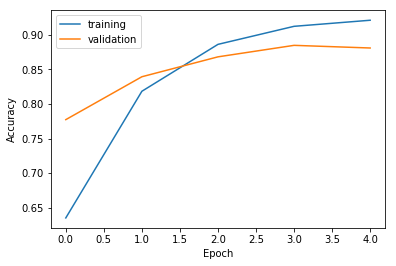

In [124]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'],label='training')
plt.plot(history.epoch, history.history['val_accuracy'],label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')